# Exploring Network Architectures

In this section you will:

* Explore the impact of different neural network architectures on performance including:
  * Accuracy,
  * Training time,
  * And loss
* Build an intuition for how layers can build up or destroy useful information

## What is Network Architecture

In short, a neural network architecture's is defined the number and shape of it's layers. In state-of-the-art neural networks these architectures can get quite complex, with some layers skipping other layers, or some layers passing data backwards to previous layers. This lab is focused on relatively simple architectures for fully connected neural networks. 

Once again, we'll be working with the MNIST dataset.

In [1]:
# Imports and formatting the data
# See previous lab if this is confusing
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Define the number of classes to create 1-hot encoded vectors using to_categorical
num_classes = 10 
# 28 x 28 = 784, because that's the dimensions of the MNIST data.
image_size = 784

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
# training_images.shape[0] is the list length, hence 60,000.
# training_images.shape[1] is the image shape, hence (28, 28).
training_data = training_images.reshape(training_images.shape[0], image_size) 
test_data = test_images.reshape(test_images.shape[0], image_size)

# Show the changes.
print("training data: ", training_images.shape, " ==> ", training_data.shape)

# to_categorical takes a list of integers (our labels) and makes them into 1-hot vectors
training_labels = to_categorical(training_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# Recall that before this transformation, training_labels[0] was the value 5. Look now:
print(training_labels[0])

# A helpful function we'll be using all over the place to plot training information:
def plot_training_history(history, model):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()
    
    loss, accuracy  = model.evaluate(test_data, test_labels, verbose=False)
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

training data:  (60000, 28, 28)  ==>  (60000, 784)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Purpose of Layers

Each layer is an opportunity to add *or reduce* complexity. In some cases, enormous complexity is required to accurately model a problem. In other cases, simpler architectures may perform better.

One appropriate analogy is that a neural network is like an assembly line–each layer adds a piece of the final product, and as our data nears the end, a complete picture emerges.

Another appropriate analogy is that a neural netork is like the game of telephone—every time we say the phrase we just heard into the ear of our neighbor, some of the information is lost. By the end, the phrase has changed completely. 

Paradoxically, these are both true. Sometime we want to ignore parts of the input, because they may be irrelevant. Othertimes, we need to build up complex interactions between different pieces of the input. 

One truism though, is that more complex models always require more training.

## Even Simple Architectures Can Work

Even this simple model will significantly outperform random guessing, and it's fast and easy to train.

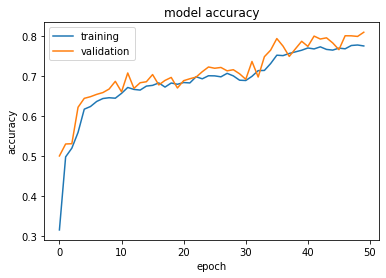

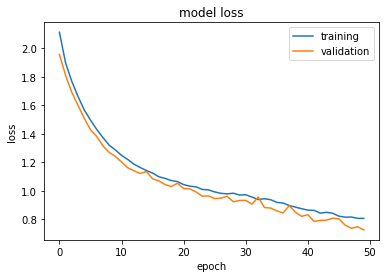

Test loss: 0.786
Test accuracy: 0.78


In [2]:
model = Sequential()

model.add(Dense(units=5, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))

model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_data, training_labels, batch_size=128, epochs=50, verbose=False, validation_split=.1)
plot_training_history(history, model)

## Too Simple Is Also Possible

Overly simplistic models will always fail. Frankly, it is remarkable that this next network performs as well as it does (nearly twice as good as guessing randomly!) but no amount of training will make this network architecture an accurate classifier.

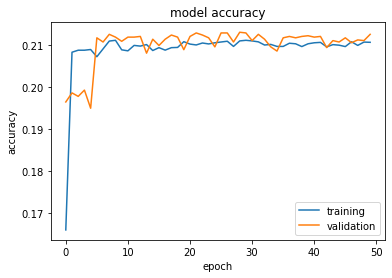

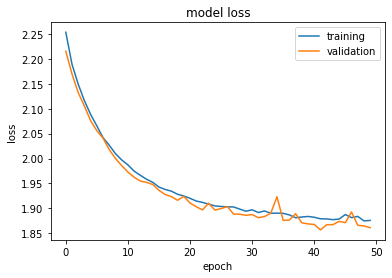

Test loss: 1.86
Test accuracy: 0.211


In [3]:
model = Sequential()

model.add(Dense(units=1, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))

model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_data, training_labels, batch_size=128, epochs=50, verbose=False, validation_split=.1)
plot_training_history(history, model)

## More Parameters is Often Better 

Increasing the number of parameters can often yield better results, in this case we have to train for fewer epochs to achieve a higher accuracy. But keep in mind that we are almost always trading speed and computational power for accuracy. 

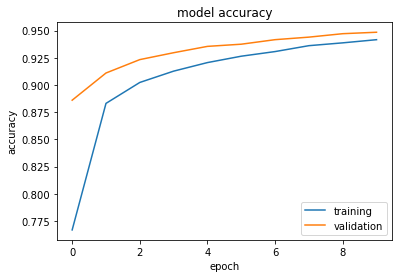

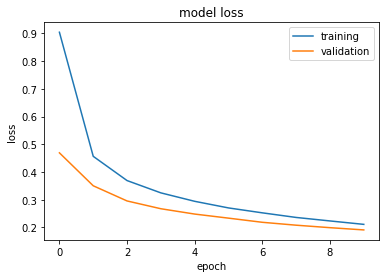

Test loss: 0.218
Test accuracy: 0.938


In [4]:
model = Sequential()

model.add(Dense(units=256, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))

model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_data, training_labels, batch_size=128, epochs=10, verbose=False, validation_split=.1)
plot_training_history(history, model)

# Complexity Allows More Overfitting

While overly simple networks don't have the capacity to capture the phenomenon (underfitting) overly complex networks have enough capacity to "memorize" the training data, which can result in overfitting. Overfitting also tends to become more pronounced as we train networks for more epochs.

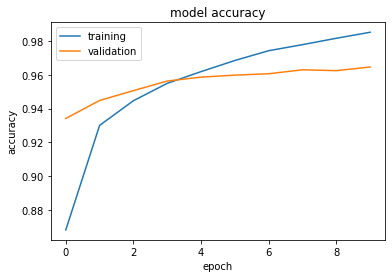

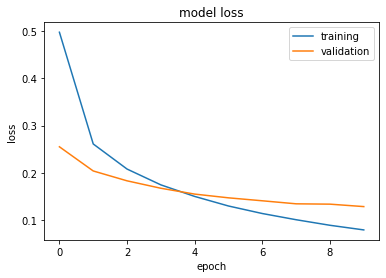

Test loss: 0.148
Test accuracy: 0.956


In [5]:
model = Sequential()

model.add(Dense(units=2048, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))

model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_data, training_labels, batch_size=128, epochs=10, verbose=False, validation_split=.1)
plot_training_history(history, model)

Notice how after awhile we see that our performance on training data is better than on validation data. This is a sign that we might have overfit our data—and indeed the model tops out at over 98% on the training data, but drops down to 95% on the test data. This model with a 2048-node layer performs a little better than the previous one which had only 256 nodes in its hidden layer. Lets see what happens when we really get extreme:

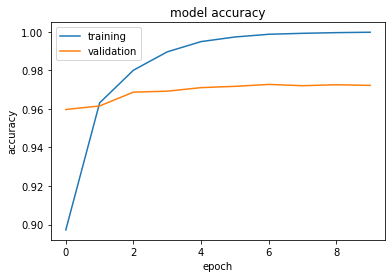

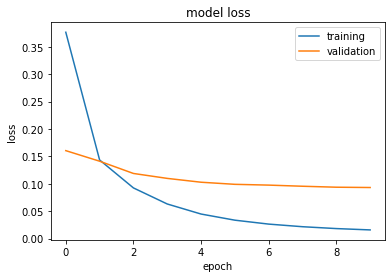

Test loss: 0.109
Test accuracy: 0.966


In [6]:
model = Sequential()

model.add(Dense(units=10000, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))

model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_data, training_labels, batch_size=128, epochs=10, verbose=False, validation_split=.1)
plot_training_history(history, model)

This network took **much** longer to train. It appears to be overfit as early as the second training epoch, and indeed when we run the test data it's worse than the training performance. It's worth noting that this is still a pretty good result though at 96% test accuracy.

This is an example of the diminishing returns that neural networks sometimes exhibit — it takes a LOT of power and time and complexity to squeeze out the last few percentage points of accuracy.

## Multiple Layers

Making each layer wider is one way to add complexity, but not the only way. Consider these two architectures: 

In [7]:
# 10,000 total nodes in hidden layers
wide_model = Sequential()
wide_model.add(Dense(units=10000, activation='sigmoid', input_shape=(image_size,)))
wide_model.add(Dense(units=num_classes, activation='softmax'))
wide_model.summary()

# 9000 total nodes in hidden layers
long_model = Sequential()
long_model.add(Dense(units=3000, activation='sigmoid', input_shape=(image_size,)))
long_model.add(Dense(units=3000, activation='sigmoid'))
long_model.add(Dense(units=3000, activation='sigmoid'))
long_model.add(Dense(units=num_classes, activation='softmax'))
long_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 10000)             7850000   
_________________________________________________________________
dense_11 (Dense)             (None, 10)                100010    
Total params: 7,950,010
Trainable params: 7,950,010
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 3000)              2355000   
_________________________________________________________________
dense_13 (Dense)             (None, 3000)              9003000   
_________________________________________________________________
dense_14 (Dense)             (None, 3000)              9003000   
______________________

## Some Things to Note:

The second of these models has nearly 3 times as many parameters even though it has 1000 fewer nodes. This means it will take much longer to train.

Additional layers are commonly understood to understand "higher level" features. An anology that is useful but not exactly mathematically proven is: the first layer is recognizing simple features, such as edges. The second layer is detecting combinations of edges, such as shapes. The third layer is detecting combinations of shapes... and so on. 

To be very clear: this is a helpful mental model, but should not be treated as a truism or fact. The most literal  way to understand this point is that the first layer represents combinations of the raw data-points (pixels in this case) with themselves. The second layer is combinations of those combinations. As we go deeper, we are very literally making at combinations of combinations of combinations.

Regardless of the interpretation, "Deep Learning" is the study of deep neural networks. State of the art results are being achieved by networks with MANY layers, not by networks with a single hidden layer.

## Lets See How `long_model` Performs...

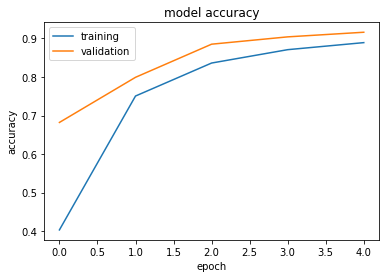

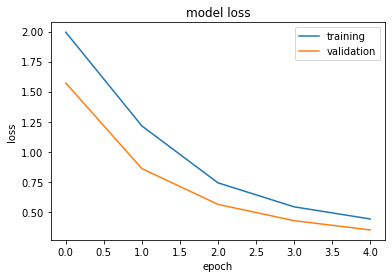

Test loss: 0.392
Test accuracy: 0.9


In [8]:
long_model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = long_model.fit(training_data, training_labels, batch_size=128, epochs=5, verbose=False, validation_split=.1)
plot_training_history(history, long_model)

Well, it takes FOREVER to train just 5 epochs, but unlike the 10k node model, it seems to continue improving rather than plateu right away. It also doesn't appear to have overfit the data. Interestingly, it's still underperforming compared to some of the simpler models, it's possible this could change if we train for long enough—but other models are doing more with significantly fewer resources... it's worth thinking about why that might be. 

## Thinking About Resolution

In the case of the MNIST digits dataset, the initial input is only 28 by 28 pixels, a total of 784 data points. In the previous `wide_model` and `long_model` we 'increased' the resolution of the each datapoint to 10,000 and 3000 values per layer respectively. 

The strength of neural networks is capturing complex interactions between data points, but scaling 784 values into 10,000 or 3000 nodes makes training the network harder and makes the problem of the second layer **more** complex than the original problem. Obviously, we were still able to achieve decent performance this way, but consider this:

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_17 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_19 (Dense)             (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


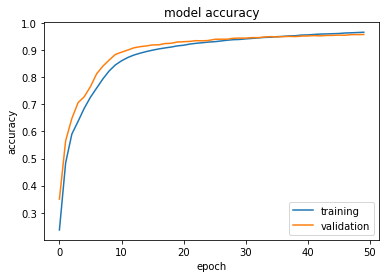

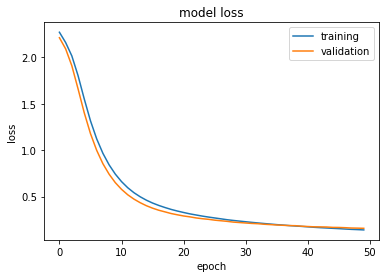

Test loss: 0.183
Test accuracy: 0.949


In [9]:
long_model_two = Sequential()
long_model_two.add(Dense(units=256, activation='sigmoid', input_shape=(image_size,)))
long_model_two.add(Dense(units=128, activation='sigmoid'))
long_model_two.add(Dense(units=64, activation='sigmoid'))
long_model_two.add(Dense(units=num_classes, activation='softmax'))
long_model_two.summary()

long_model_two.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = long_model_two.fit(training_data, training_labels, batch_size=128, epochs=50, verbose=False, validation_split=.1)
plot_training_history(history, long_model_two)

By reducing the size of the problem at each layer, we make each epoch much faster. In this case, we've also improved accuracy. As in many things, overcomplication is a big problem. On MNIST, its possible to do better than 95% with a deep neural net, but to really break into the top tier (99% accuracy has been achieved) we need Convolutional Neural Networks, which we'll study later. 